In [1]:
from config_simulation import (
    simulation_linear_regression,
    simulation_logistic_regression,
    simulation_geometric_median,
    simulation_spherical_distribution,
    simulation_p_means,
    eval_covtype,
    n,
    N,
    nu_list,
    gamma_list,
)
from optimization_algorithms import SNARiccati


optimizer_class = SNARiccati
optimizer_list = [optimizer_class(nu=nu) for nu in nu_list]

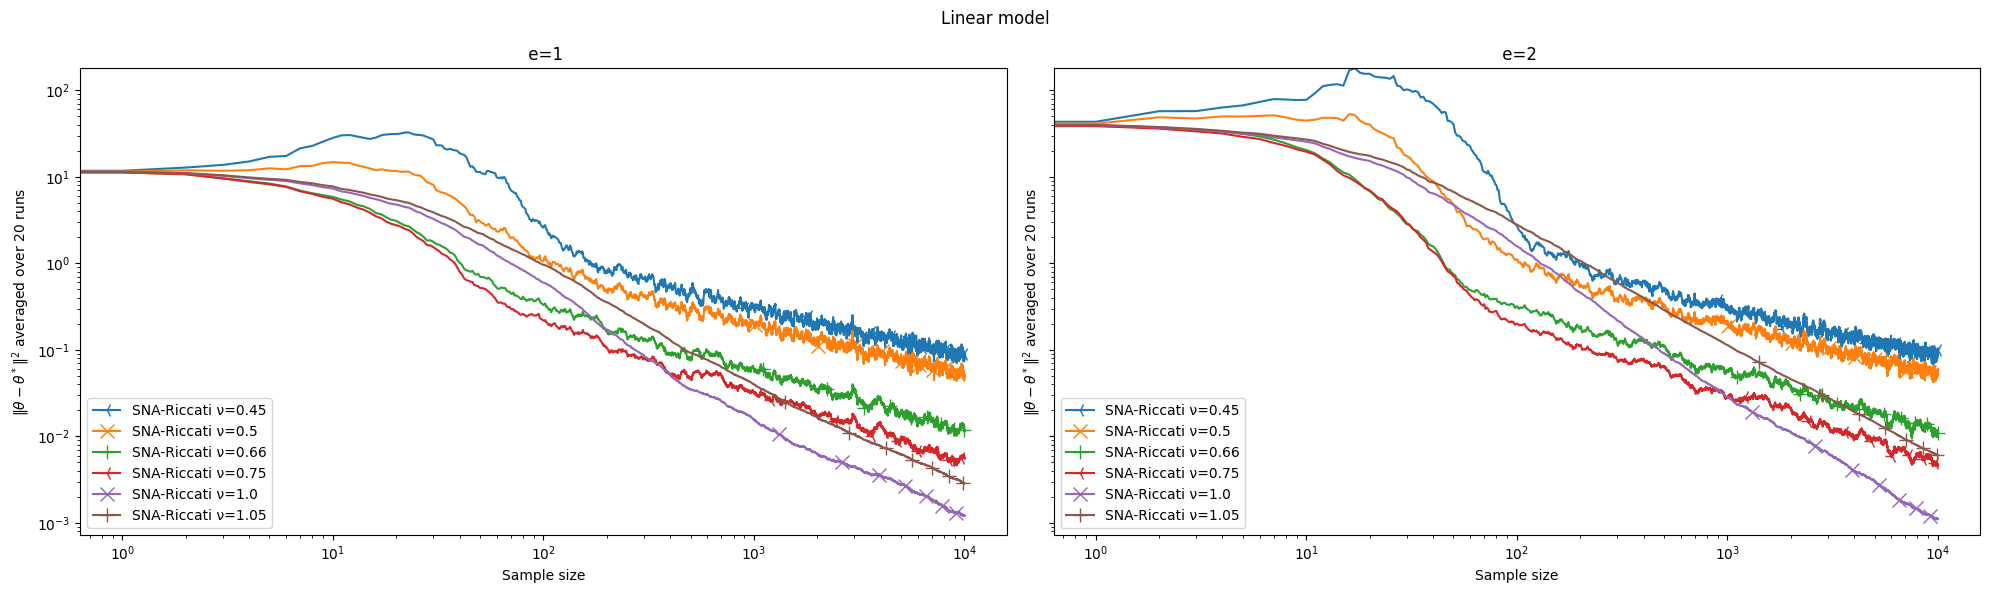

In [2]:
simulation = simulation_linear_regression(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

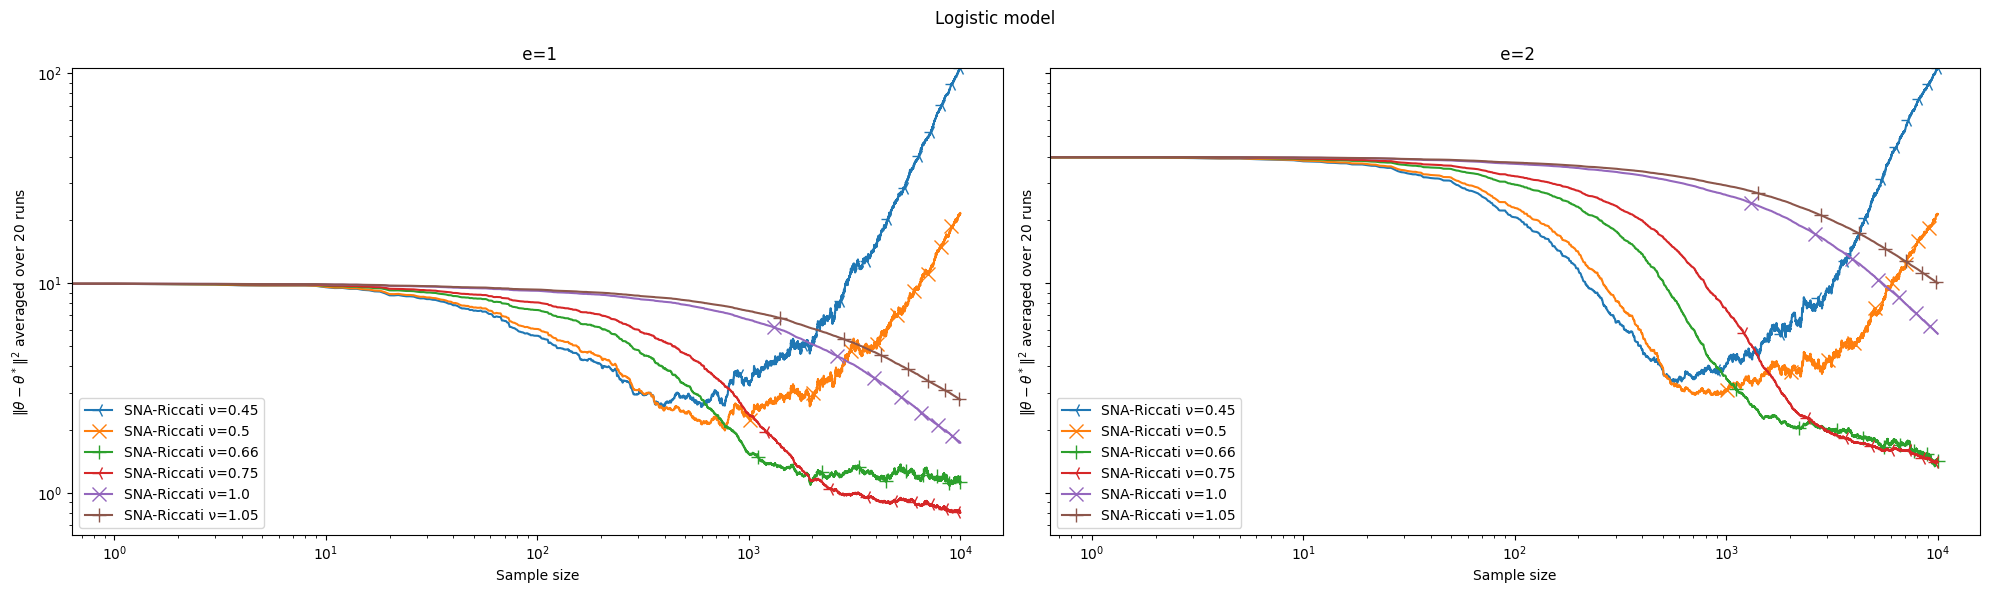

In [3]:
simulation = simulation_logistic_regression(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

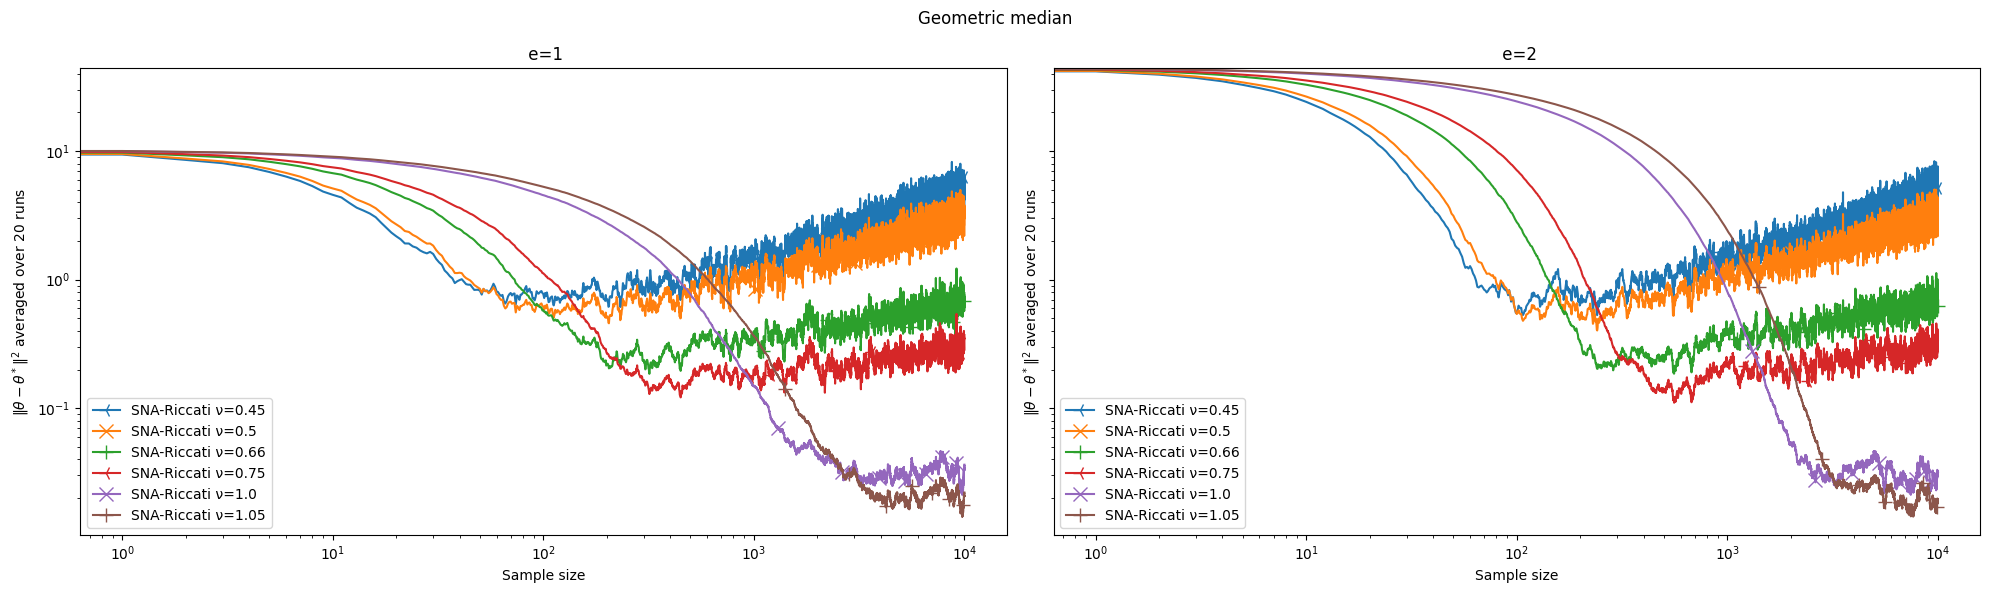

In [4]:
simulation = simulation_geometric_median(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

In [7]:
eval = eval_covtype(optimizer_list=optimizer_list)
_, _ = eval.run()

Optimizers:   0%|          | 0/6 [00:00<?, ?it/s]

Data:   0%|          | 0/464809 [00:00<?, ?it/s]

,SNA-Riccati ν=0.45,SNA-Riccati ν=0.5,SNA-Riccati ν=0.66,SNA-Riccati ν=0.75,SNA-Riccati ν=1.0,SNA-Riccati ν=1.05
Training Accuracy,70.370000,67.930000,77.130000,77.070000,76.520000,76.460000
Test Accuracy,70.350000,68.360000,77.310000,77.210000,76.650000,76.600000
